## 생존여부 예측모델 만들기
### 학습용 데이터 (X_train, y_train)을 이용하여 생존 예측 모형을 만든 후, 이를 평가용 데이터(X_test)에 적용하여 얻은 예측값을 다음과 같은 형식의 CSV파일로 생성하시오(제출한 모델의 성능은 accuracy 평가지표에 따라 채점)

(가) 제공 데이터 목록
- y_train: 생존여부(학습용)
- X_trian, X_test : 승객 정보 (학습용 및 평가용)

(나) 데이터 형식 및 내용
- y_trian (712명 데이터)

**시험환경 세팅은 예시문제와 동일한 형태의 X_train, y_train, X_test 데이터를 만들기 위함임**

### 유의사항
- 성능이 우수한 예측모형을 구축하기 위해서는 적절한 데이터 전처리, 피처엔지니어링, 분류알고리즘, 하이퍼파라미터 튜닝, 모형 앙상블 등이 수반되어야 한다.
- 수험번호.csv파일이 만들어지도록 코드를 제출한다.
- 제출한 모델의 성능은 accuracy로 평가함

csv 출력형태

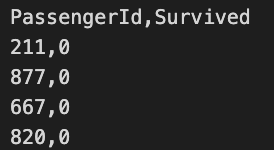

## [참고]작업형2 문구
- 출력을 원하실 경우 print() 함수 활용
- 예시) print(df.head())
- getcwd(), chdir() 등 작업 폴더 설정 불필요
- 파일 경로 상 내부 드라이브 경로(C: 등) 접근 불가

### 데이터 파일 읽기 예제
- import pandas as pd
- X_test = pd.read_csv("data/X_test.csv")
- X_train = pd.read_csv("data/X_train.csv")
- y_train = pd.read_csv("data/y_train.csv")

### 사용자 코딩

### 답안 제출 참고
- 아래 코드 예측변수와 수험번호를 개인별로 변경하여 활용
- pd.DataFrame({'cust_id': X_test.cust_id, 'gender': pred}).to_csv('003000000.csv', index=False)

In [1]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("../input/titanic/train.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='Survived', id_name='PassengerId')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712, 2), (179, 2))

## Start

## 라이브러리 및 데이터 불러오기

In [26]:
# 라이브러리 불러오기
import pandas as pd

In [27]:
# 데이터 불러오기 (생략)
X_train.shape, y_train.shape, X_test.shape

((712, 11), (712, 2), (179, 11))

## EDA

In [35]:
X_train.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
621,622,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
128,129,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
57,58,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C
341,342,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
116,117,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [29]:
# float64(2), int64(3), object(5)
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
90,91,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
103,104,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
577,578,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S
215,216,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
191,192,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S


In [34]:
y_train.head()

,PassengerId,Survived
90,91,0
103,104,0
577,578,1
215,216,1
191,192,0


In [32]:
# 생존 비율
y_train['Survived'].value_counts()

0    441
1    271
Name: Survived, dtype: int64

## 데이터 전처리

In [37]:
y = y_train["Survived"]

# 원핫인코딩
features = ['Pclass','Sex','SibSp','Parch']
X = pd.get_dummies(X_train[features])
test = pd.get_dummies(X_test[features])

In [38]:
X.shape, test.shape, y.shape

((712, 5), (179, 5), (712,))

## 모델 및 평가

In [68]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=2002)
model.fit(X,y)
prediction = model.predict(test)

In [69]:
model.score(X,y)

0.8342696629213483

In [70]:
output = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived':prediction})
output.head()

,PassengerId,Survived
210,211,0
876,877,0
666,667,0
819,820,0
736,737,1


In [46]:
# 수험번호.csv로 출력
output.to_csv('006004693.csv', index=False)

## 결과 체점 (수험자는 알 수 없는 부분임)

In [74]:
model.score(test, y_test['Survived'])

0.7318435754189944